### 1.Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import plotly.offline as pyo 
import plotly.figure_factory as ff
import plotly.io as pio

color_pal = sns.color_palette()
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

import re

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')


C:\Users\Dell\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated

C:\Users\Dell\AppData\Local\Temp\ipykernel_9396\3227172220.py:13: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



### 2.EDA 

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\archive (3)\ds_salaries.csv")

In [3]:
df = data.copy()

In [4]:
df.head(5)

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [5]:
df.shape

(607, 12)

In [6]:
cols = df.columns
cols

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [7]:
df.describe().T

count           mean           std     min      25%       50%  \
Unnamed: 0     607.0     303.000000  1.753701e+02     0.0    151.5     303.0   
work_year      607.0    2021.405272  6.921330e-01  2020.0   2021.0    2022.0   
salary         607.0  324000.062603  1.544357e+06  4000.0  70000.0  115000.0   
salary_in_usd  607.0  112297.869852  7.095726e+04  2859.0  62726.0  101570.0   
remote_ratio   607.0      70.922570  4.070913e+01     0.0     50.0     100.0   

                    75%         max  
Unnamed: 0        454.5       606.0  
work_year        2022.0      2022.0  
salary         165000.0  30400000.0  
salary_in_usd  150000.0    600000.0  
remote_ratio      100.0       100.0

In [8]:
df.describe(include='object').T

count unique             top freq
experience_level     607      4              SE  280
employment_type      607      4              FT  588
job_title            607     50  Data Scientist  143
salary_currency      607     17             USD  398
employee_residence   607     57              US  332
company_location     607     50              US  355
company_size         607      3               M  326

In [9]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [11]:
unique_values = df.nunique()
unique_values

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [12]:
df.drop(columns='Unnamed: 0',inplace=True)
df

work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE             0   
1    260000             USD         260000                 JP             0   
2     85000             GBP         109024                 GB            50   
3     20000             USD          20000                 HN             0   
4    150000             USD         150000                 US            50   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US           100   
603  126000             USD         126000                 US           100   
604  129000             USD         129000                 US             0   
605  150000             USD         150000                 US           100   
606  200000             USD         200000                 IN           100   

    company_location company_size  
0                 DE            L  
1                 JP            S  
2                 GB            M  
3                 HN            S  
4                 US            L  
..               ...          ...  
602               US            M  
603               US            M  
604               US            M  
605               US            M  
606               US            L  

[607 rows x 11 columns]

In [13]:
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-level/junior')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX', 'Excutive-level/Director')

In [14]:
df

work_year        experience_level employment_type  \
0         2020  Mid-level/Intermediate              FT   
1         2020     Senior-level/Expert              FT   
2         2020     Senior-level/Expert              FT   
3         2020  Mid-level/Intermediate              FT   
4         2020     Senior-level/Expert              FT   
..         ...                     ...             ...   
602       2022     Senior-level/Expert              FT   
603       2022     Senior-level/Expert              FT   
604       2022     Senior-level/Expert              FT   
605       2022     Senior-level/Expert              FT   
606       2022  Mid-level/Intermediate              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 11 columns]

### 3.Null values

In [15]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<Axes: >

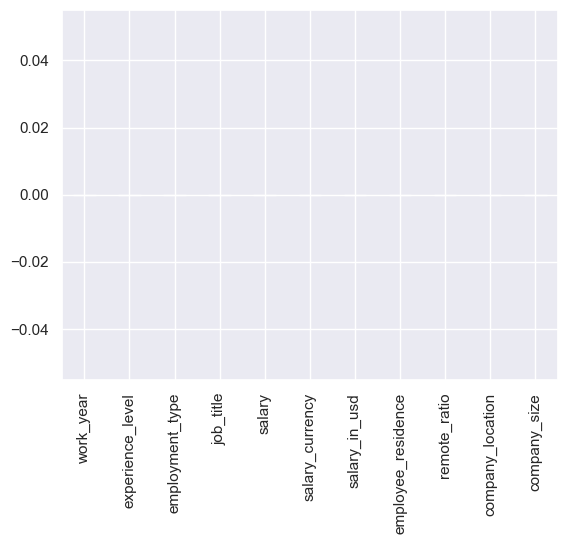

In [16]:
df.isna().sum().plot(kind='bar')

### 4.Duplicate rows

In [17]:
duplicate_rows = df[df.duplicated(keep='first')]

num_duplicates = duplicate_rows.shape[0]

print(f'Number of duplicate rows: {num_duplicates}')
duplicate_rows

Number of duplicate rows: 42


work_year        experience_level employment_type  \
217       2021  Mid-level/Intermediate              FT   
256       2021  Mid-level/Intermediate              FT   
331       2022     Senior-level/Expert              FT   
332       2022     Senior-level/Expert              FT   
333       2022     Senior-level/Expert              FT   
353       2022     Senior-level/Expert              FT   
362       2022     Senior-level/Expert              FT   
363       2022     Senior-level/Expert              FT   
370       2022     Senior-level/Expert              FT   
374       2022  Mid-level/Intermediate              FT   
377       2022     Senior-level/Expert              FT   
385       2022     Senior-level/Expert              FT   
392       2022     Senior-level/Expert              FT   
393       2022     Senior-level/Expert              FT   
406       2022  Mid-level/Intermediate              FT   
438       2022     Senior-level/Expert              FT   
439       2022     Senior-level/Expert              FT   
443       2022  Mid-level/Intermediate              FT   
446       2022     Senior-level/Expert              FT   
447       2022     Senior-level/Expert              FT   
473       2022     Senior-level/Expert              FT   
527       2022     Senior-level/Expert              FT   
529       2022     Senior-level/Expert              FT   
536       2022     Senior-level/Expert              FT   
537       2022     Senior-level/Expert              FT   
545       2022     Senior-level/Expert              FT   
547       2022     Senior-level/Expert              FT   
551       2022     Senior-level/Expert              FT   
555       2022     Senior-level/Expert              FT   
566       2022     Senior-level/Expert              FT   
569       2022     Senior-level/Expert              FT   
571       2022     Senior-level/Expert              FT   
572       2022     Senior-level/Expert              FT   
574       2022     Senior-level/Expert              FT   
575       2022     Senior-level/Expert              FT   
576       2022     Senior-level/Expert              FT   
578       2022     Senior-level/Expert              FT   
587       2022     Senior-level/Expert              FT   
588       2022     Senior-level/Expert              FT   
592       2022     Senior-level/Expert              FT   
596       2022     Senior-level/Expert              FT   
597       2022     Senior-level/Expert              FT   

                     job_title  salary salary_currency  salary_in_usd  \
217             Data Scientist   76760             EUR          90734   
256              Data Engineer  200000             USD         200000   
331               Data Analyst   90320             USD          90320   
332               Data Analyst  112900             USD         112900   
333               Data Analyst   90320             USD          90320   
353             Data Scientist  123000             USD         123000   
362               Data Analyst  130000             USD         130000   
363               Data Analyst   61300             USD          61300   
370             Data Scientist  123000             USD         123000   
374              ETL Developer   50000             EUR          54957   
377              Data Engineer  165400             USD         165400   
385              Data Engineer  132320             USD         132320   
392               Data Analyst  112900             USD         112900   
393               Data Analyst   90320             USD          90320   
406               Data Analyst   58000             USD          58000   
438  Machine Learning Engineer  189650             USD         189650   
439  Machine Learning Engineer  164996             USD         164996   
443              Data Engineer   60000             GBP          78526   
446              Data Engineer  209100             USD         209100   
447              Data Engineer  154600            

### 5.Data Visualisation

In [18]:
df.head(4)

work_year        experience_level employment_type  \
0       2020  Mid-level/Intermediate              FT   
1       2020     Senior-level/Expert              FT   
2       2020     Senior-level/Expert              FT   
3       2020  Mid-level/Intermediate              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S

Text(0.5, 1.0, 'Distrubtion of Salary in Usd')

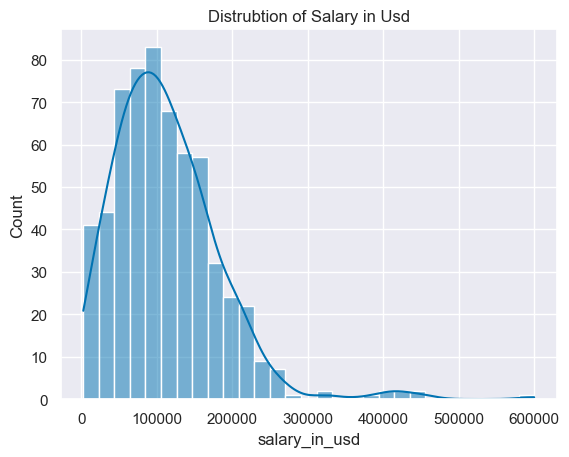

In [19]:
sns.histplot(data=df,x='salary_in_usd',kde=True)
plt.title('Distrubtion of Salary in Usd')

Text(0.5, 1.0, 'Distrubtion of Work Year')

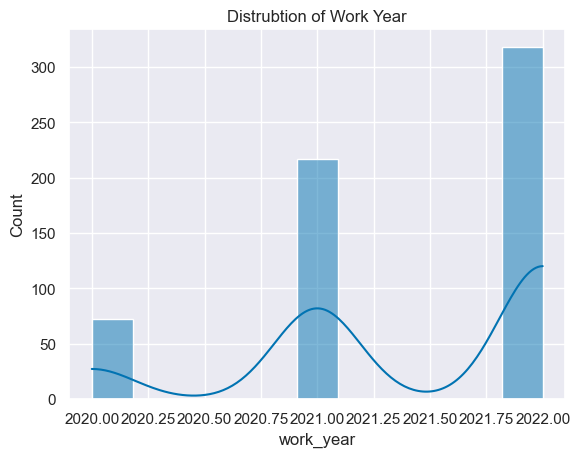

In [20]:
sns.histplot(data=df,x='work_year',kde=True)
plt.title('Distrubtion of Work Year')

Text(0.5, 1.0, 'Distrubtion of Remote Ratio')

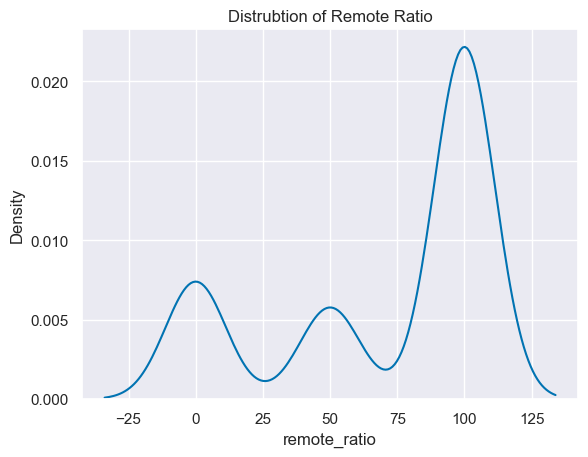

In [21]:
sns.kdeplot(data=df,x='remote_ratio')
plt.title('Distrubtion of Remote Ratio')

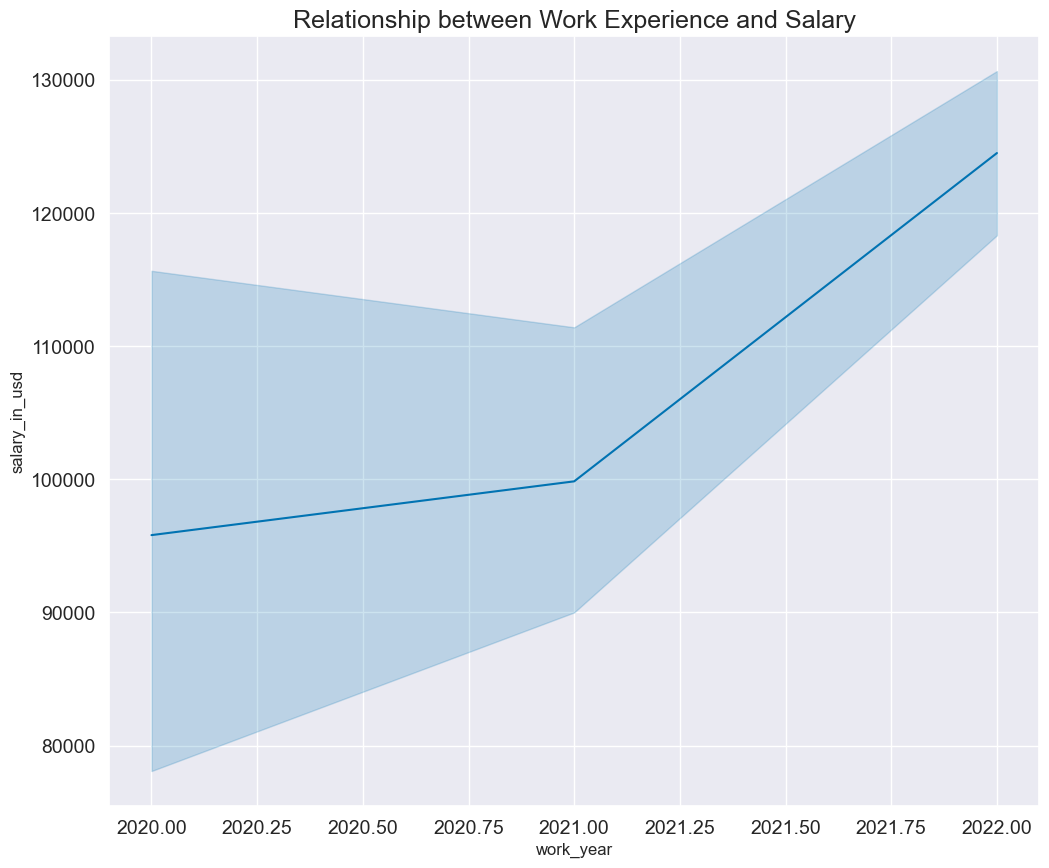

In [22]:
#calculating the salary according to the work_year
plt.figure(figsize=(12,10))
sns.lineplot(data=df,x=df["work_year"],y=df['salary_in_usd'])
plt.title('Relationship between Work Experience and Salary',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

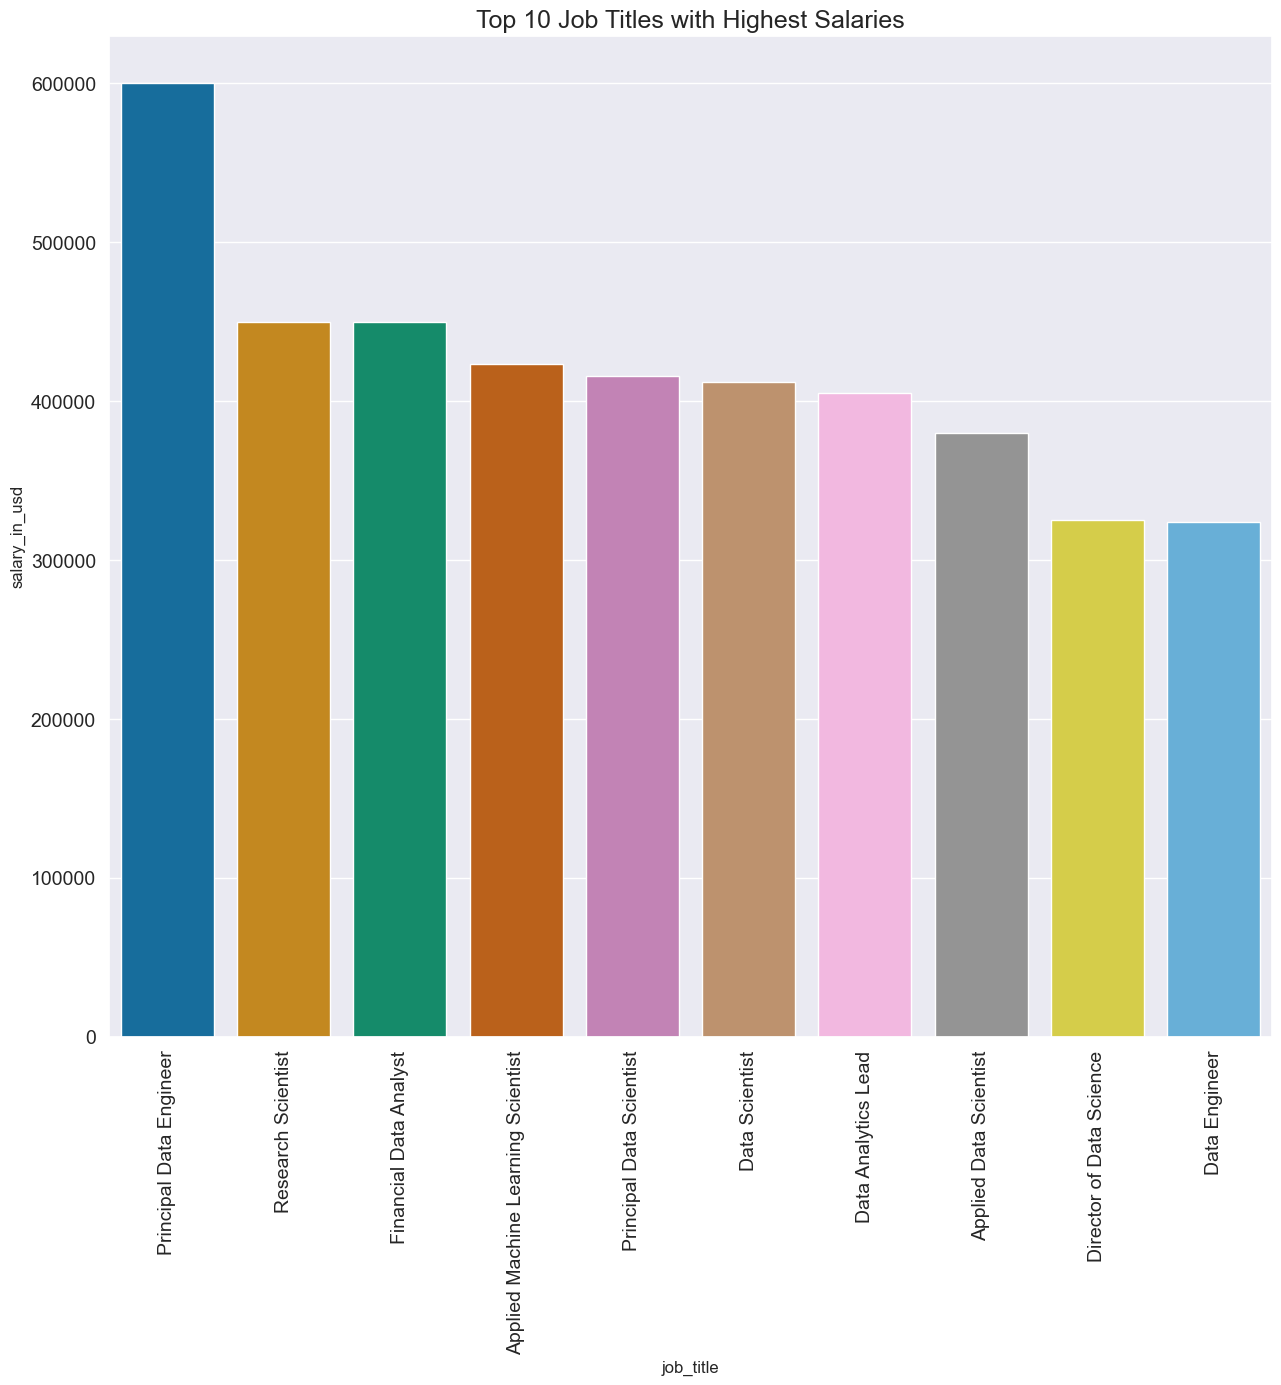

In [23]:
top_10 = df.nlargest(10, 'salary_in_usd')
plt.figure(figsize=(15,13))
sns.barplot(data=top_10,x='job_title',y='salary_in_usd')
plt.title('Top 10 Job Titles with Highest Salaries',fontsize=18)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize=14)
plt.show()

In [24]:
year_20 = df.loc[df['work_year']==2020]
top_5_20 = year_20.nlargest(5,'salary_in_usd')

year_21 = df.loc[df['work_year']==2021]
top_5_21 = year_21.nlargest(5,'salary_in_usd')

year_22 = df.loc[df['work_year']==2022]
top_5_22 = year_22.nlargest(5,'salary_in_usd')


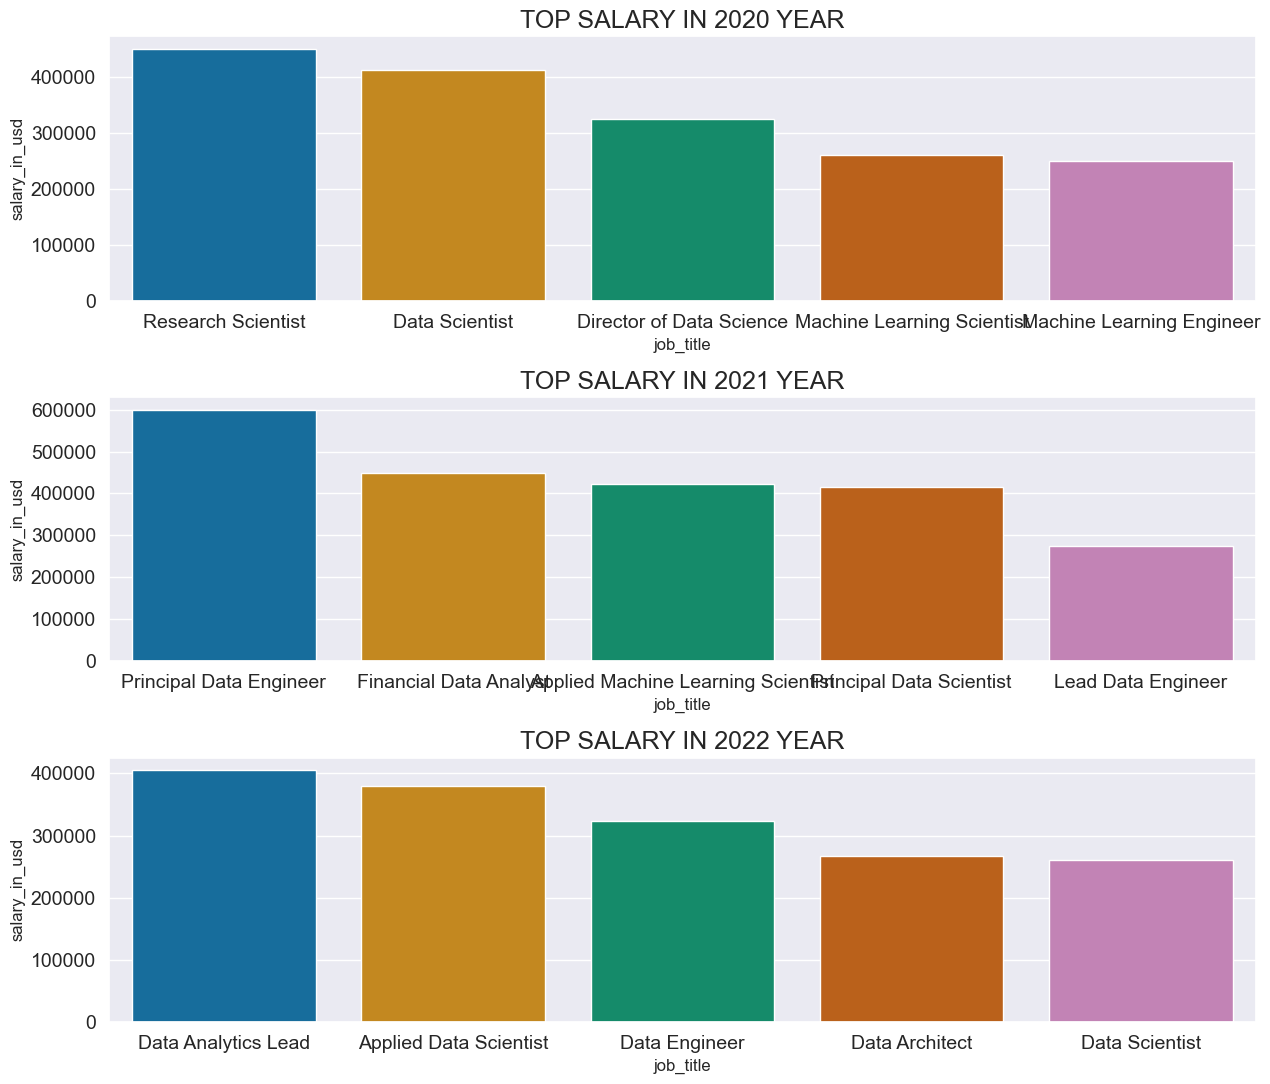

In [25]:
# Creating subplots using plt.subplot()
plt.figure(figsize=(13, 11))

# First subplot
plt.subplot(3, 1, 1)
sns.barplot(data=top_5_20,x='job_title',y='salary_in_usd')
plt.title('TOP SALARY IN 2020 YEAR',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Second subplot
plt.subplot(3, 1, 2)
sns.barplot(data=top_5_21,x='job_title',y='salary_in_usd')
plt.title('TOP SALARY IN 2021 YEAR',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Third subplot
plt.subplot(3, 1, 3)
sns.barplot(data=top_5_22,x='job_title',y='salary_in_usd')
plt.title('TOP SALARY IN 2022 YEAR',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


In [26]:
l_year_20 = df.loc[df['work_year']==2020]
least_5_20 = year_20.nsmallest(5,'salary_in_usd')

l_year_21 = df.loc[df['work_year']==2021]
least_5_21 = year_21.nsmallest(5,'salary_in_usd')

l_year_22 = df.loc[df['work_year']==2022]
least_5_22 = year_22.nsmallest(5,'salary_in_usd')


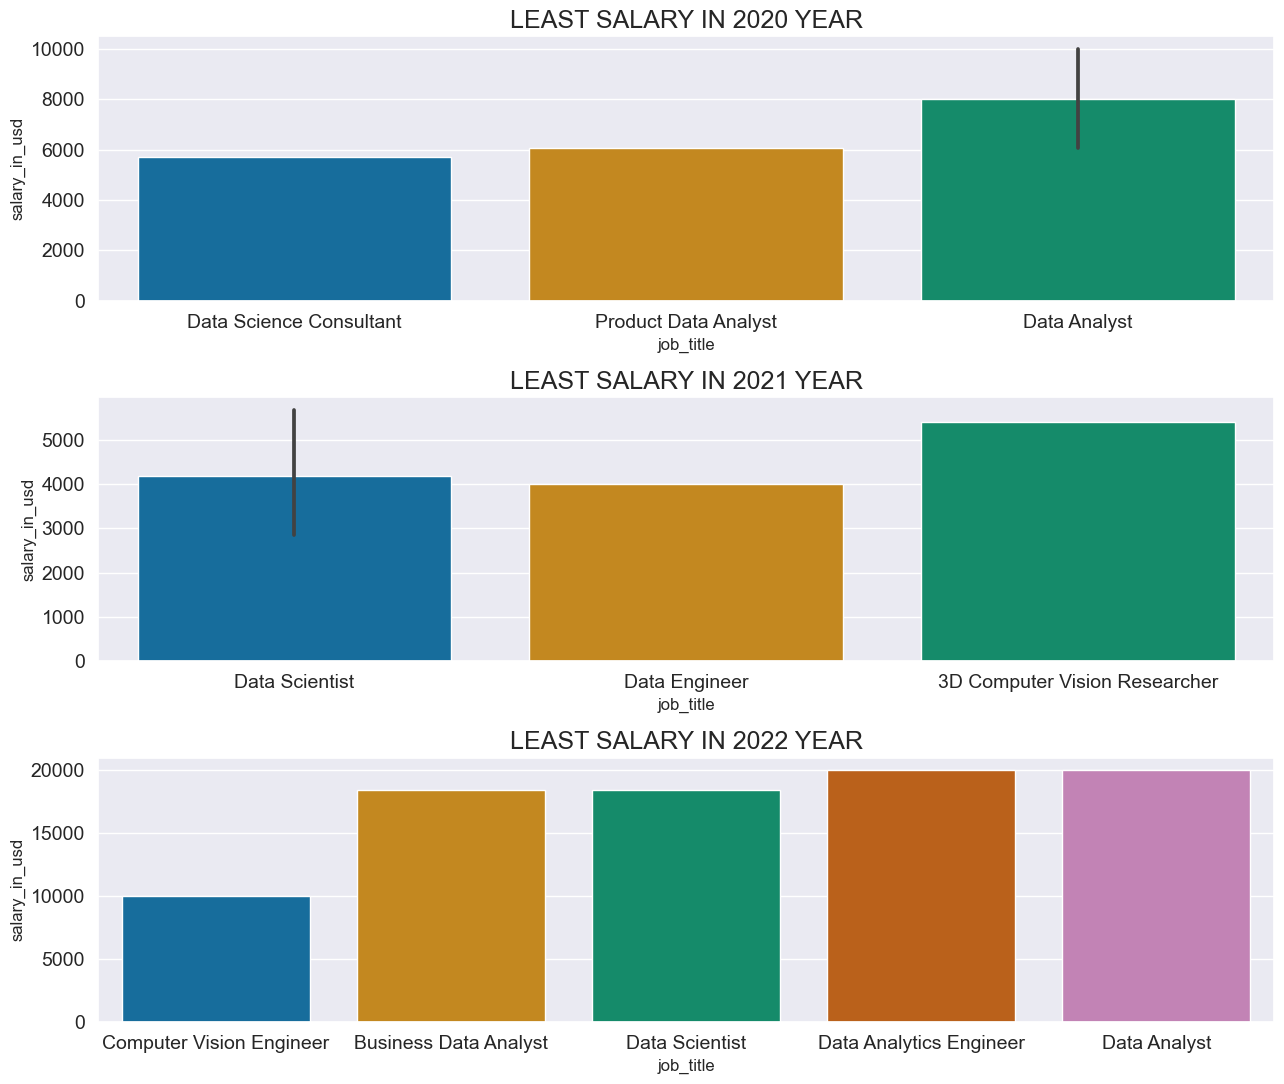

In [27]:
# Creating subplots using plt.subplot()
plt.figure(figsize=(13, 11))

# First subplot
plt.subplot(3, 1, 1)
sns.barplot(data=least_5_20,x='job_title',y='salary_in_usd')
plt.title('LEAST SALARY IN 2020 YEAR',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Second subplot
plt.subplot(3, 1, 2)
sns.barplot(data=least_5_21,x='job_title',y='salary_in_usd')
plt.title('LEAST SALARY IN 2021 YEAR',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Third subplot
plt.subplot(3, 1, 3)
sns.barplot(data=least_5_22,x='job_title',y='salary_in_usd')
plt.title('LEAST SALARY IN 2022 YEAR',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


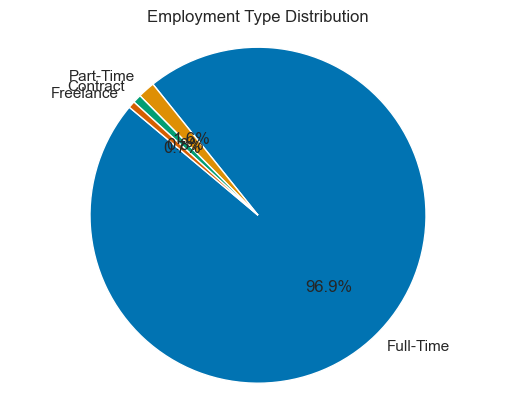

In [28]:
value_counts = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']
plt.pie(value_counts, labels=emp_type, autopct='%1.1f%%', startangle=140)
plt.title('Employment Type Distribution')
plt.axis('equal')  
plt.show()

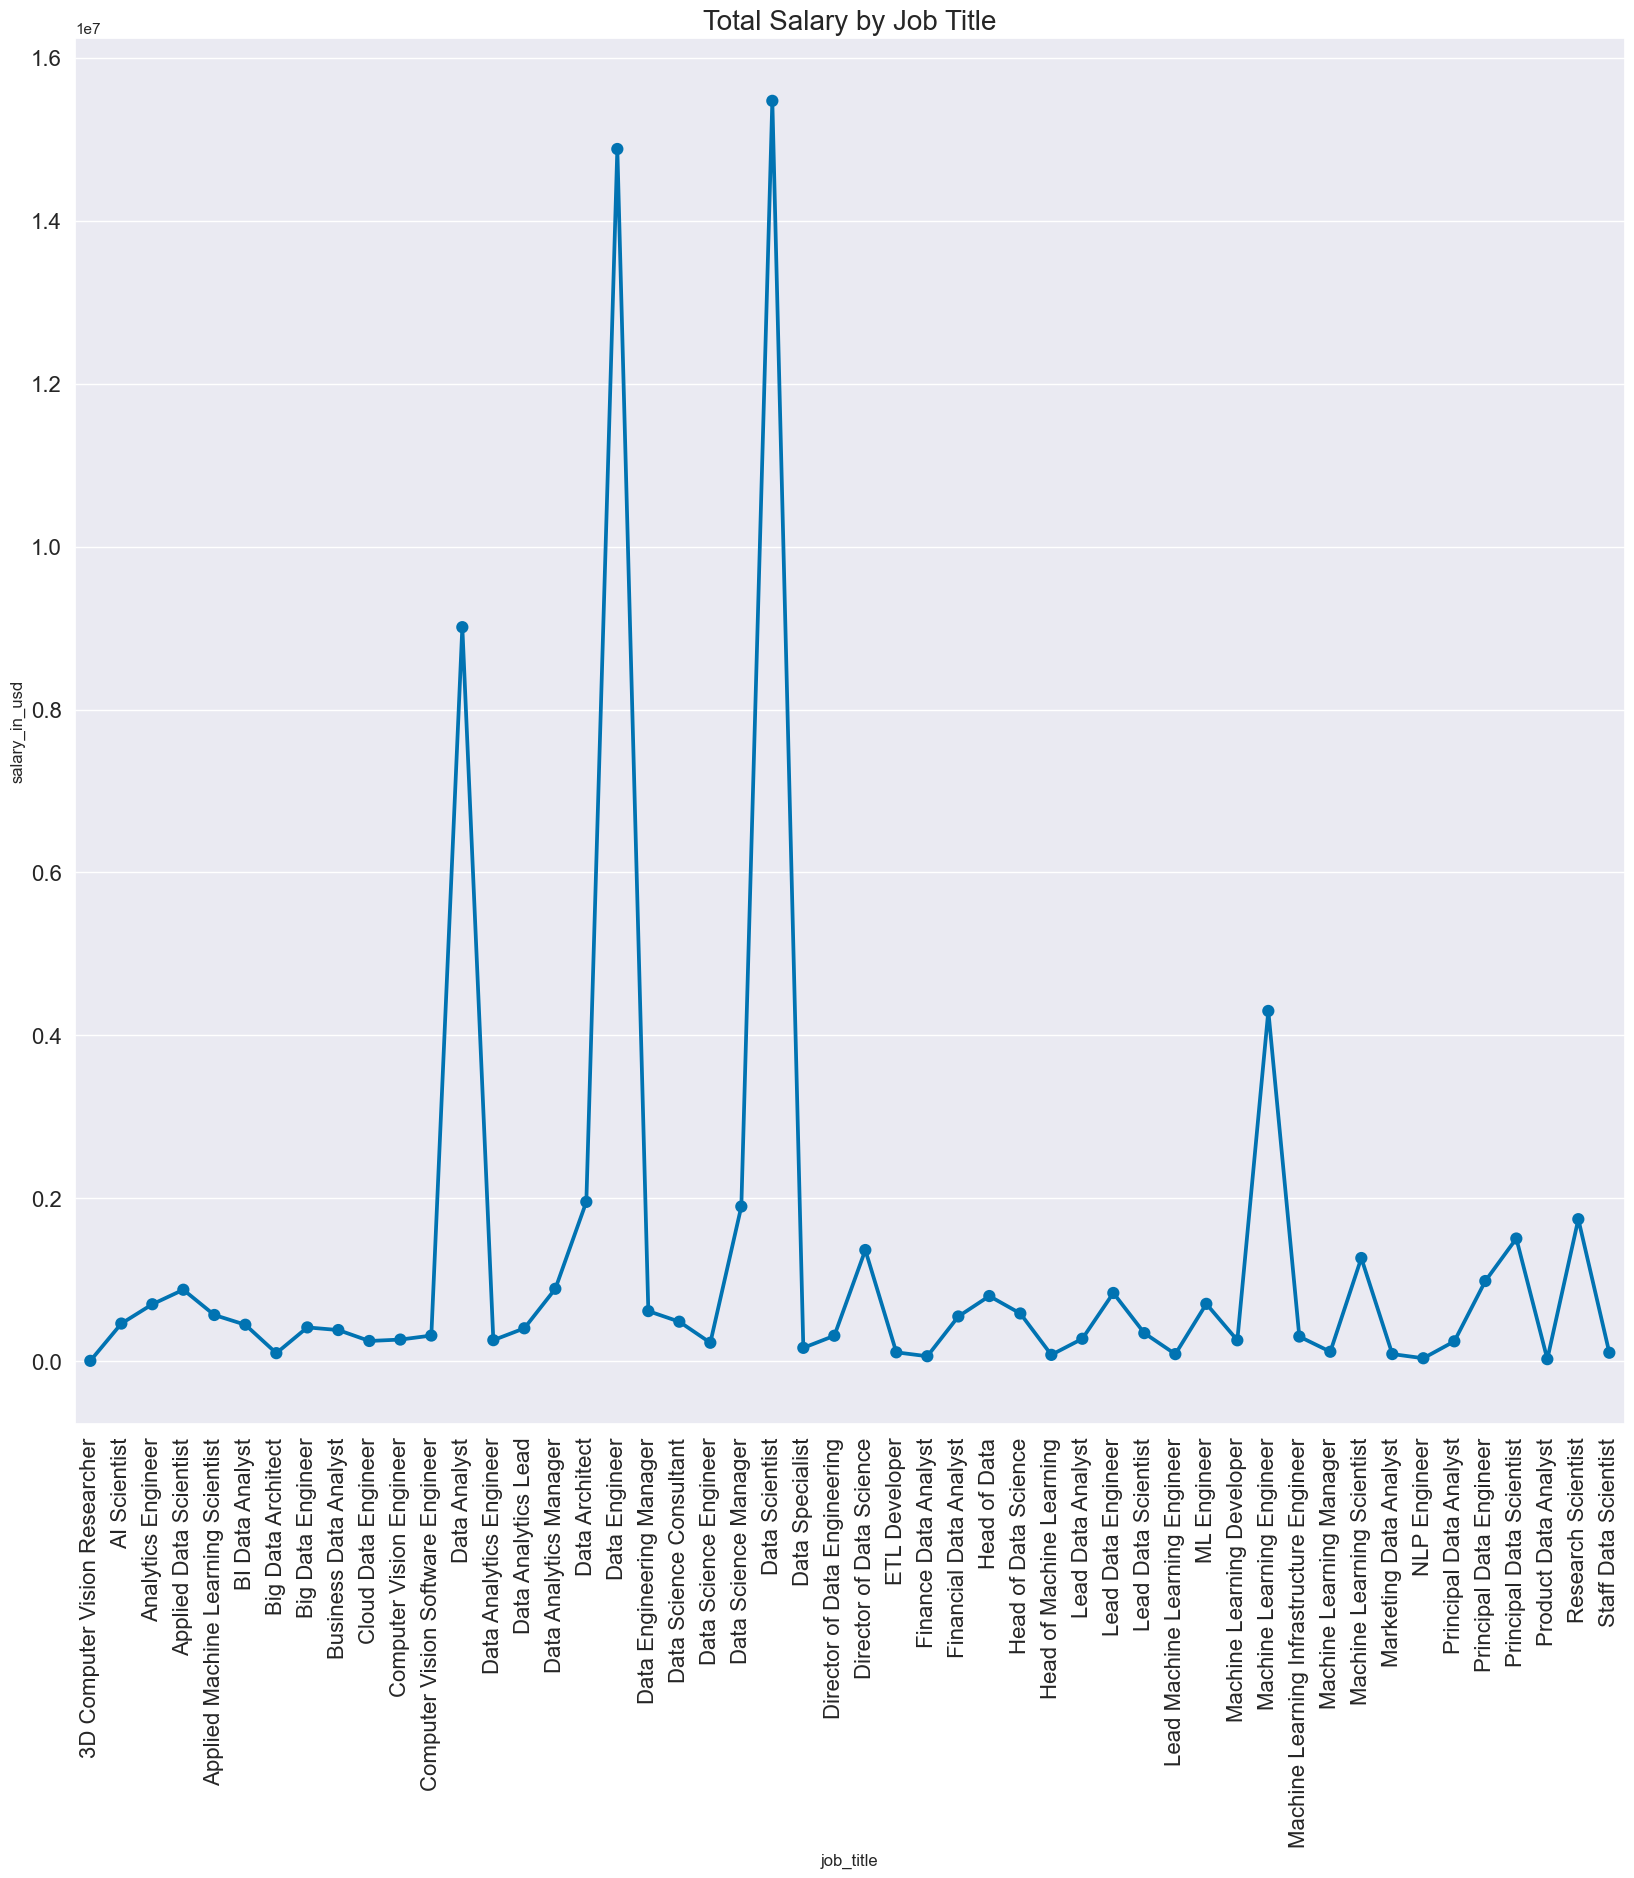

In [29]:
monthly_trends = df.groupby('job_title')['salary_in_usd'].sum().reset_index()
plt.figure(figsize=(20,18))
sns.pointplot(data=monthly_trends,x='job_title',y='salary_in_usd')
plt.title('Total Salary by Job Title', fontsize=20)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [30]:
 top10_job_title = df['job_title'].value_counts()[:10]

fig = px.bar(
    y=top10_job_title.values,  
    x=top10_job_title.index,  
    color=top10_job_title.index,  
    color_discrete_sequence=px.colors.sequential.PuBuGn, 
    text=top10_job_title.values,  
    title='Top 10 Job Titles',  
    template='plotly_dark' 
)

fig.update_layout(
    title_text='Job Distribution',  
    height=650,  
    xaxis_title="Job Titles",  
    yaxis_title="Count",
    font=dict(size=17, family="Franklin Gothic")  
)

# Display the plot
fig.show()

In [31]:
exp = df.groupby('experience_level')['salary_in_usd'].sum().reset_index()
fig = px.histogram(data_frame=exp,x='experience_level',y='salary_in_usd')
fig.update_layout(
    title_text = 'salary Comparison by Experience Level',
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'),
)


In [32]:
xn = df.groupby('company_size')['salary_in_usd'].sum().reset_index()
fig = px.pie(data_frame=xn,values=xn['salary_in_usd'].values,names='company_size',color='company_size',opacity=0.7, hole=0.5)
fig.update_layout(
    title_text = 'Total Salary by Company Size')

In [33]:
residence_sal = df.groupby('employee_residence')['salary_in_usd'].sum().reset_index()
top_5_residence_salary = residence_sal.nlargest(5,'salary_in_usd')
fig = px.area(data_frame=top_5_residence_salary,x='employee_residence',y='salary_in_usd',template='plotly_dark')
fig.update_layout(
    title_text='Top 5 Employee Residences by Total Salary in USD')
fig.show()

In [34]:
res_sal = df.groupby('employee_residence')['salary'].sum().reset_index()
top_5 = res_sal.nlargest(5,'salary')
fig = px.bar(data_frame=top_5,x='employee_residence',y='salary',color='employee_residence')
fig.update_layout(
    title_text='Top 5 Employee Residences by Total Salary Own Currency')

In [35]:
job_ratio = df.groupby(['job_title', 'remote_ratio', 'salary_in_usd']).size().reset_index(name='counts')
top_10_jobs = job_ratio.groupby('job_title')['salary_in_usd'].median().nlargest(10).index.tolist()
top_10_job_ratio = job_ratio[job_ratio['job_title'].isin(top_10_jobs)]
pivot_table = top_10_job_ratio.pivot_table(index=['job_title', 'salary_in_usd'], columns='remote_ratio', values='counts',fill_value=0).reset_index()
print(pivot_table)

remote_ratio                 job_title  salary_in_usd  0  50  100
0                   Analytics Engineer         135000  0   0    1
1                   Analytics Engineer         175000  0   0    1
2                   Analytics Engineer         184700  1   0    0
3                   Analytics Engineer         205300  1   0    0
4               Applied Data Scientist          54238  0   1    0
5               Applied Data Scientist         110037  1   0    0
6               Applied Data Scientist         157000  0   0    1
7               Applied Data Scientist         177000  0   0    1
8               Applied Data Scientist         380000  0   0    1
9                  Data Analytics Lead         405000  0   0    1
10                      Data Architect          90700  0   0    1
11                      Data Architect         144854  0   0    1
12                      Data Architect         147800  0   0    1
13                      Data Architect         150000  0   0    1
14        

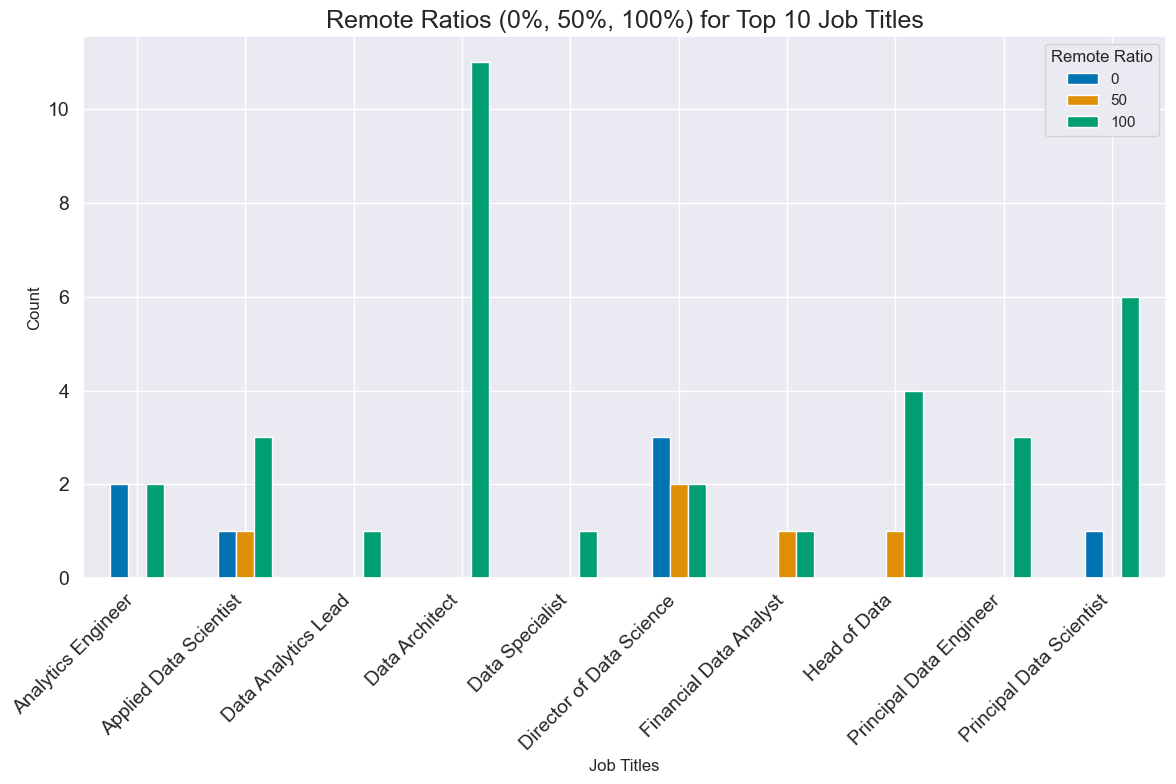

In [36]:
top_10_jobs = df.groupby('job_title')['salary_in_usd'].median().nlargest(10).index.tolist()
top_10_df = df[df['job_title'].isin(top_10_jobs)]

pivot_table = top_10_df.pivot_table(index='job_title', columns='remote_ratio', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=False, figsize=(12, 8))

plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.title('Remote Ratios (0%, 50%, 100%) for Top 10 Job Titles',fontsize=18)
plt.legend(title='Remote Ratio')
plt.xticks(rotation=45, ha='right',fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


In [37]:
job_ratio = df.groupby(['remote_ratio', 'company_size']).size().reset_index(name='counts')
top_10_jobs = job_ratio.groupby('company_size')['remote_ratio'].median().index.tolist()
top_10_job_ratio = job_ratio[job_ratio['company_size'].isin(top_10_jobs)]

pivot_ = top_10_job_ratio.pivot_table(index=['company_size', 'remote_ratio'], values='counts',fill_value=0).reset_index()
pivot_

company_size  remote_ratio  counts
0            L             0      32
1            L            50      60
2            L           100     106
3            M             0      79
4            M            50      21
5            M           100     226
6            S             0      16
7            S            50      18
8            S           100      49

In [38]:
fig = px.sunburst(pivot_, path=['company_size', 'remote_ratio'], values='counts')
fig.update_layout(
    title='Counts of Remote Ratio by Company Size')
fig.show()

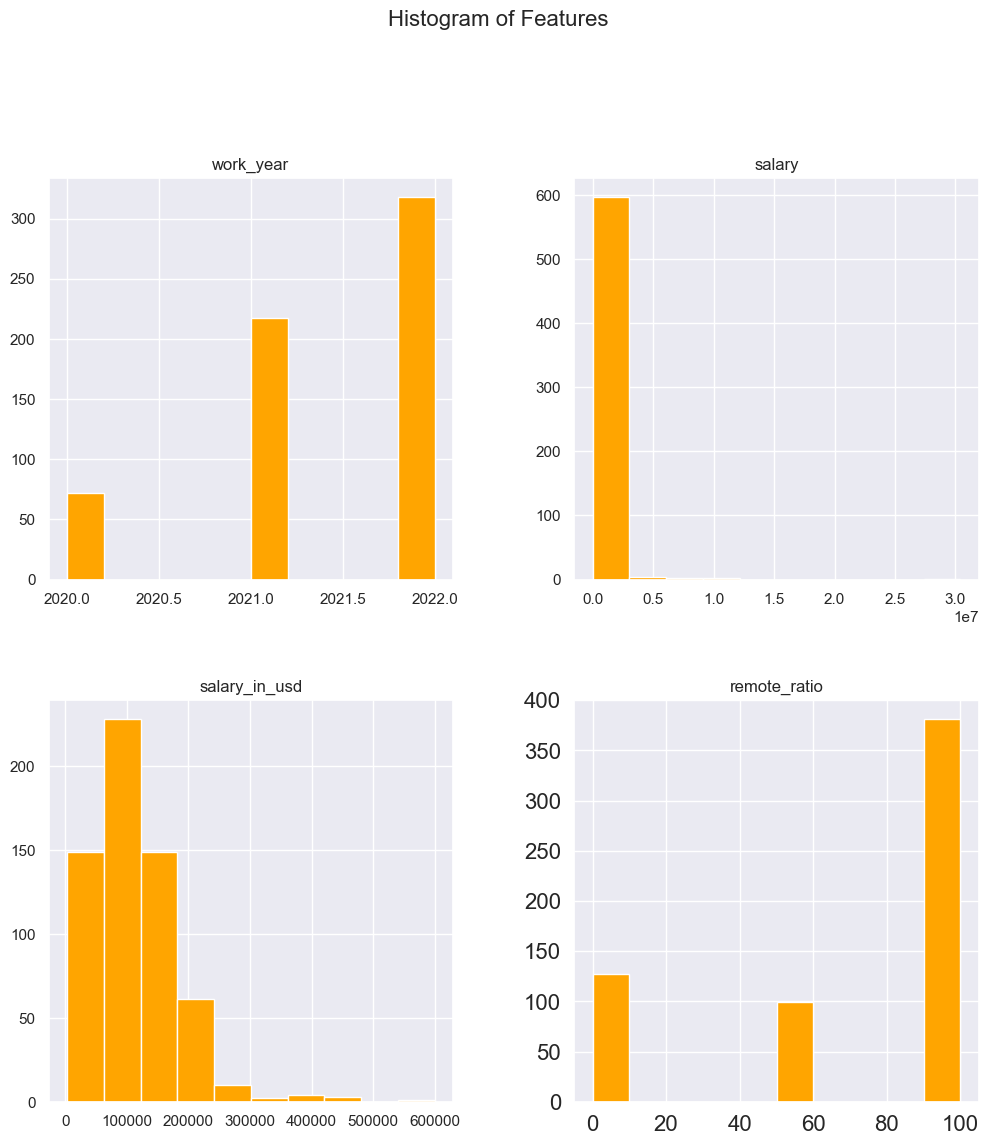

In [39]:
df.hist(figsize=(12,12),color='orange')
plt.suptitle("Histogram of Features", y=1.02, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

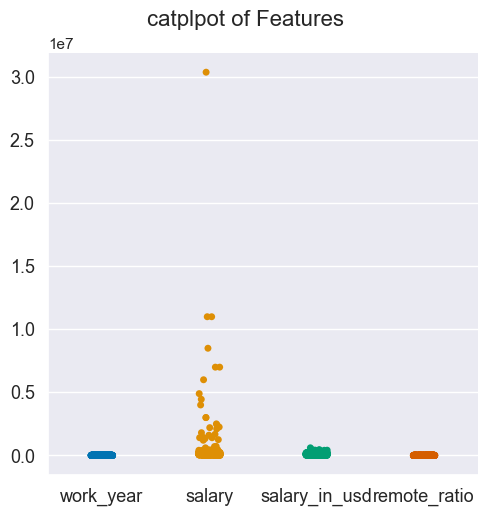

In [40]:
sns.catplot(df)
plt.suptitle("catplpot of Features", y=1.02, fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

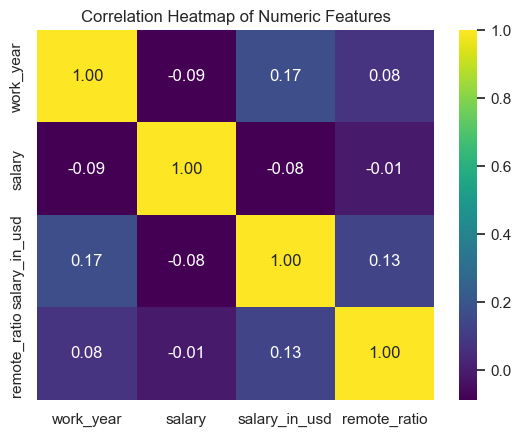

In [41]:
n = ['work_year','salary','salary_in_usd','remote_ratio']
sns.heatmap(df[n].corr(),annot=True,cmap="viridis",fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

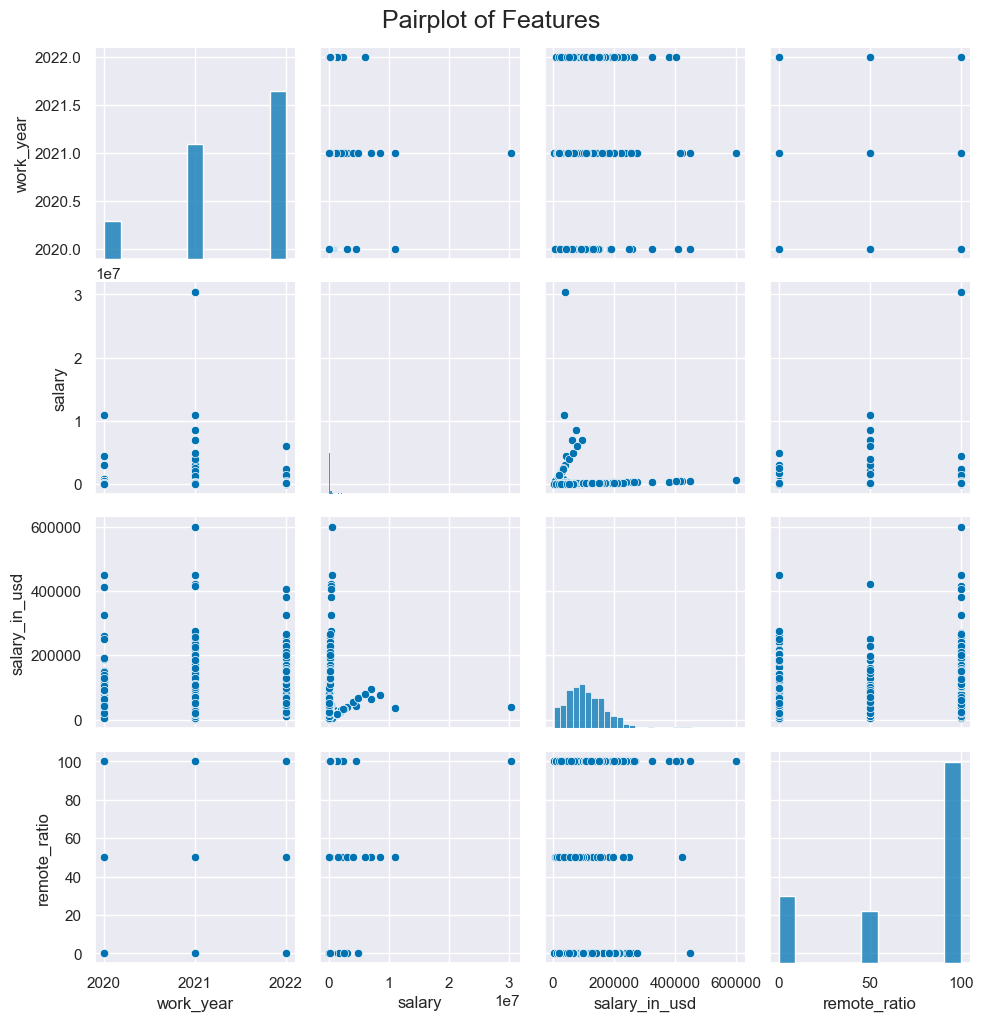

In [42]:
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02,fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

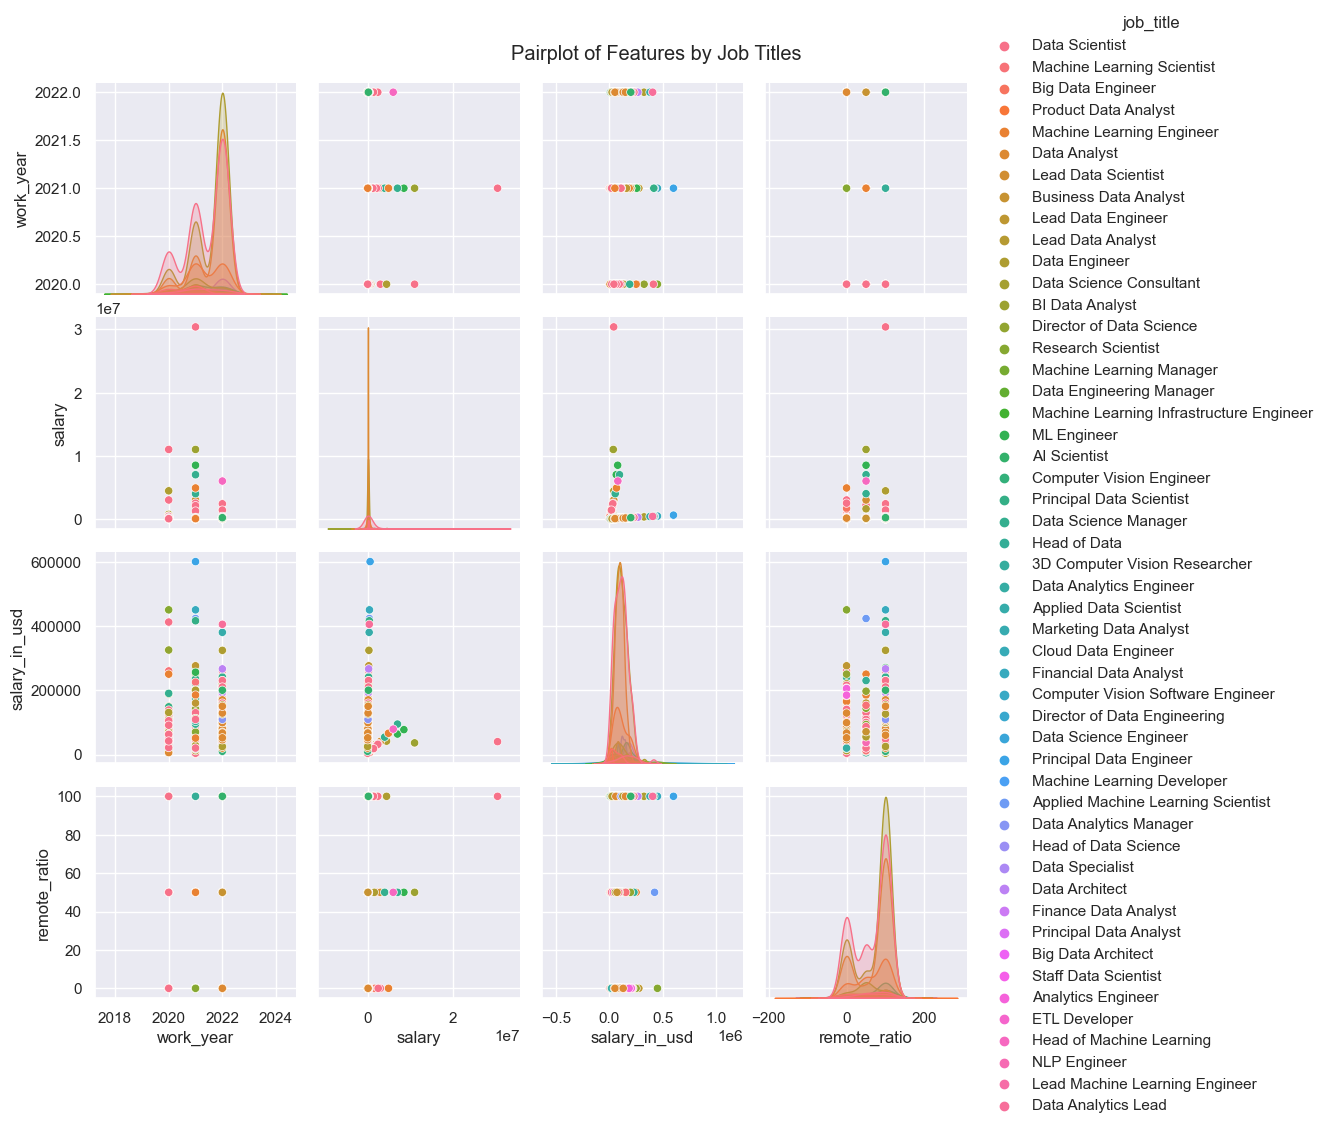

In [43]:
sns.pairplot(df, hue='job_title')
plt.suptitle("Pairplot of Features by Job Titles",y=1.02)
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

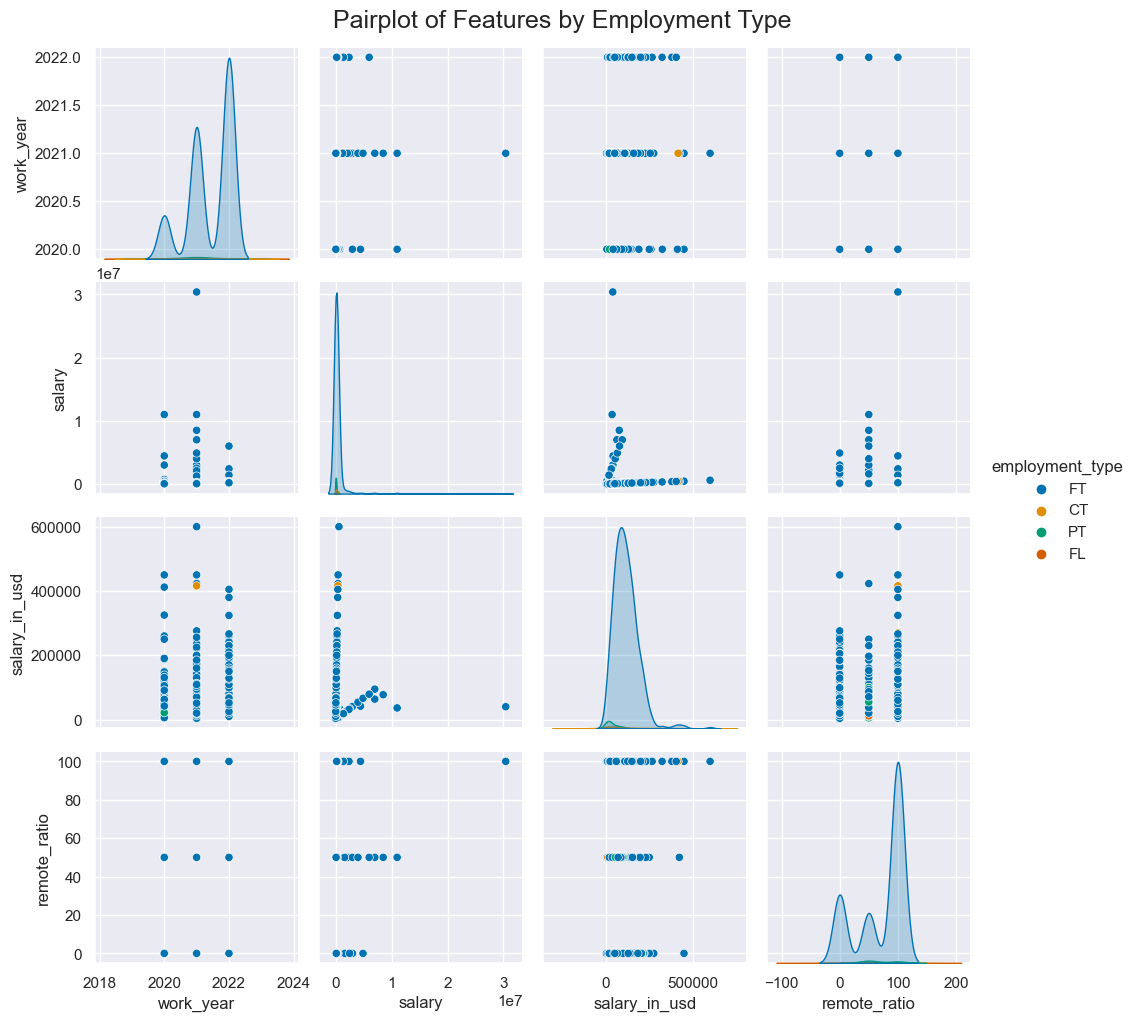

In [44]:
sns.pairplot(df, hue='employment_type')
plt.suptitle("Pairplot of Features by Employment Type",y=1.02,fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

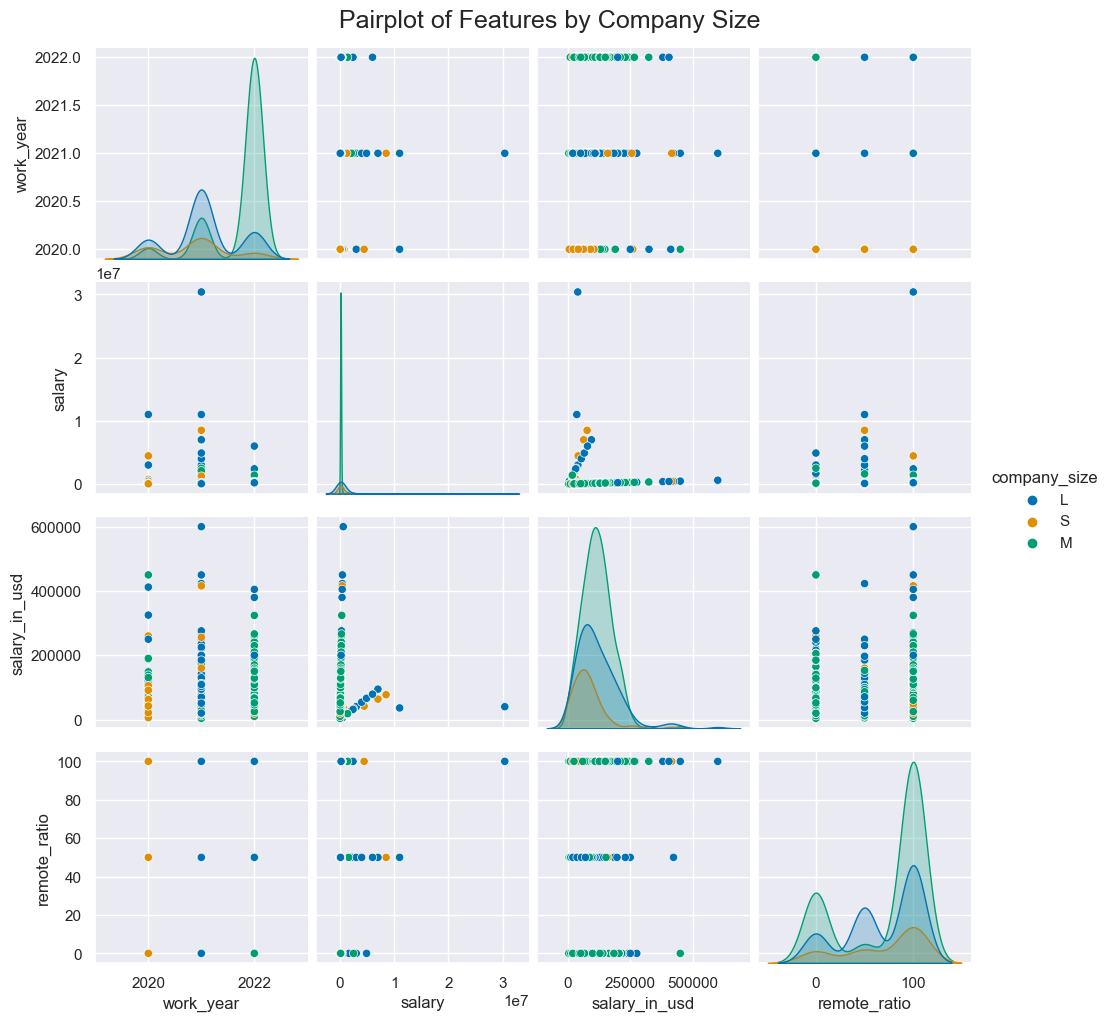

In [45]:
sns.pairplot(df, hue='company_size')
plt.suptitle("Pairplot of Features by Company Size",y=1.02,fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()